## KOSIS에 있는 데이터 중 국립도서관 데이터 분석

### Data Load

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import koreanize_matplotlib

import warnings
warnings.filterwarnings(action='ignore')

df_q5 = pd.read_csv('국립도서관_데이터.csv', encoding = "cp949")
df_q5.head()

,시점,도서관별(1),장서수(권),사서수(명),방문자 수(명),자료(인쇄)구입비(천원)
0,2010,국립중앙도서관,6447239,147,801714,14959175
1,2010,국회도서관,2779247,104,290563,4972953
2,2010,법원도서관,320397,27,12099,1645469
3,2011,국립중앙도서관,6835515,149,915862,4802240
4,2011,국회도서관,2944610,128,326715,4992448


#### 데이터

- 2010 ~ 2018년까지의 국립도서관 별 장서수(권), 사서수(명), 방문자 수(명), 자료(인쇄)구입비(천원)에 대한 통계

- 국립 도서관은 "국립중앙도서관, 국회도서관, 법원도서관"이 해당된다.

<br>

#### 분석하고자 하는 것

: 연도별 각 국립도서관의 장서수, 사서수, 방문자 수, 자료구입비에 대한 통계

  1. 연도별 각 국립도서관의 장서수

  2. 연도별 각 국립도서관의 사서수, 방문자 수
  
  3. 연도별 각 국립도서관의 자료구입비

### 1. 연도별 각 국립도서관의 장서수

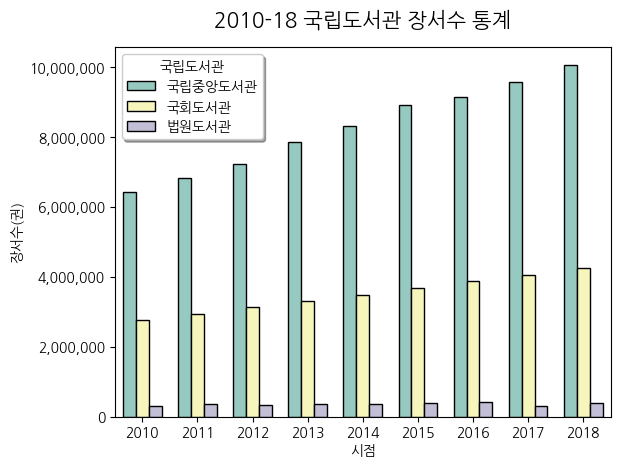

In [2]:
plt.title("2010-18 국립도서관 장서수 통계", pad = 15, fontsize = 15)
sns.barplot(data=df_q5, x="시점", y="장서수(권)", hue = "도서관별(1)", edgecolor='black', palette = 'Set3', width=0.7)
plt.legend(title="국립도서관", ncol=1, fontsize=10, frameon=True, shadow=True)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()

#### Insight

- 국립도서관 중 국립중앙도서관이 보관하고 있는 책이 가장 많은 것을 확인할 수 있다.

- 국회도서관은 국립중앙도서관이 보관하고 있는 책의 절반정도의 책을 보관하고 있음을 확인할 수 있다.

- 국립중앙도서관과 국회도서관이 보관하고 있는 책은 2010년부터 2018년까지 계속해서 증가하고 있다.

- 법원도서관은 2010년부터 2018년까지 장서수의 변화량이 크지 않은 것으로 보여 새로이 들어오는 책이 거의 없음을 알 수 있다.

- 국립중앙도서관은 2010년부터 2018년까지 장서수의 변화량이 다소 큰 것으로 보여 계속해서 새로이 들어오는 책들이 많음을 알 수 있다.

### 2. 연도별 각 국립도서관의 사서수, 방문자 수

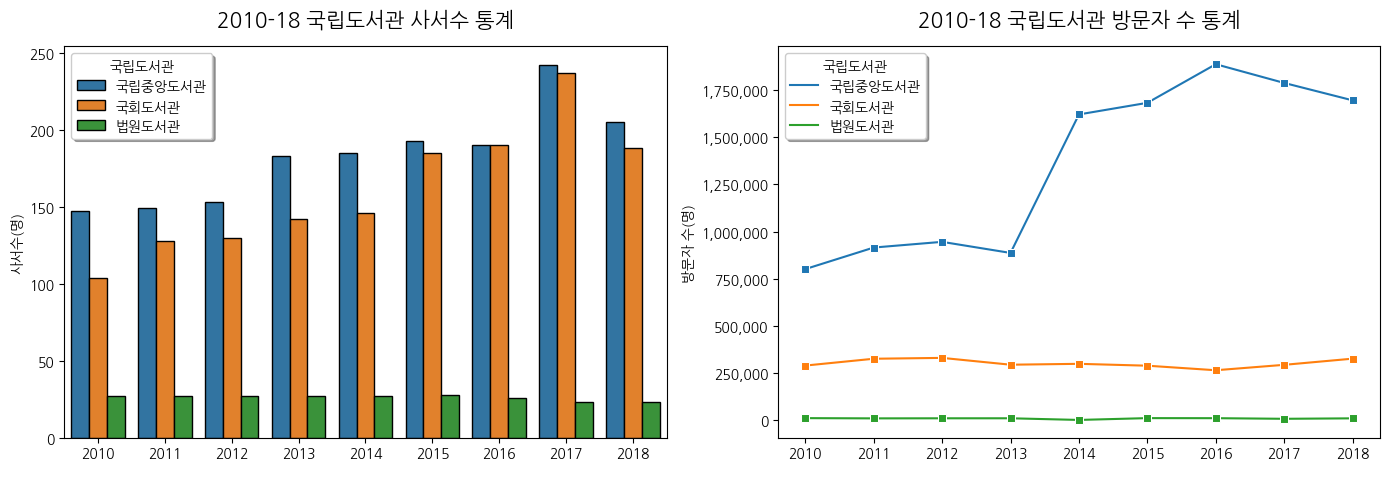

In [3]:
plt.figure(figsize=(14,5))

# 연도별 각 국립도서관의 사서수 통계
plt.subplot(1,2,1)
plt.title("2010-18 국립도서관 사서수 통계", pad = 15, fontsize = 15)
sns.barplot(data=df_q5, x="시점", y="사서수(명)", hue="도서관별(1)", edgecolor='black')
plt.legend(title="국립도서관", ncol=1, fontsize=10, frameon=True, shadow=True)
plt.xlabel(" ")

# 연도별 각 국립도서관의 방문자 수 통계
plt.subplot(1,2,2)
plt.title("2010-18 국립도서관 방문자 수 통계", pad = 15, fontsize = 15)
sns.lineplot(data=df_q5, x="시점", y="방문자 수(명)", hue="도서관별(1)", marker = "s")
# 방문자 수 y축 라벨 변환
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.legend(title="국립도서관", ncol=1, fontsize=10, frameon=True, shadow=True)
plt.xlabel(" ")


plt.tight_layout()

#### Insight

- 국립중앙도서관과 국회도서관의 사서는 법원도서관의 사서보다 더 많음을 확인할 수 있다.
- 국립중앙도서관과 국회도서관의 사서는 2017년에서 2018년으로 넘어가면서 인원이 감소함을 확인할 수 있다.
- 국립중앙도서관은 연도 중 2013년, 2017년에 사서수의 변화가 다소 큰 것을 확인할 수 있다.
- 국회도서관은 연도 중 2011년, 2015년, 2017년에 사서수의 변화가 다소 큰 것을 확인할 수 있다.
- 법원도서관의 사서수는 거의 변화가 없음을 확인할 수 있다.

- 국립중앙도서관의 방문자 수가 국회도서관과 법원도서관의 방문자 수보다 훨씬 많음을 확인할 수 있다.
- 국립중앙도서관은 2013년을 기준으로 방문하는 사람의 수가 급격히 늘어난 것을 확인할 수 있다.
- 국립중앙도서관은 2016년 이후부터 방문하는 사람의 수가 감소하고 있음을 확인할 수 있다.
- 국회도서관과 법원도서관은 2010년부터 2018년까지 방문자 수의 변화가 거의 없음을 확인할 수 있다.

### 3. 연도별 각 국립도서관의 자료구입비

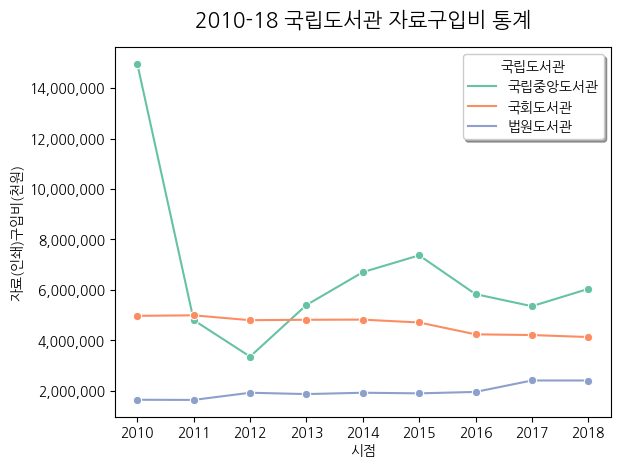

In [4]:
plt.title("2010-18 국립도서관 자료구입비 통계", pad = 15, fontsize = 15)

sns.lineplot(data=df_q5, x="시점", y="자료(인쇄)구입비(천원)", hue="도서관별(1)", marker = "o", palette = 'Set2')
plt.legend(title="국립도서관", ncol=1, fontsize=10, frameon=True, shadow=True)

# y축 라벨 변환
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()

#### Insight

- 국립중앙도서관은 2010년에서 2011년으로 넘어가면서 자료구입비가 급격하게 감소하는 것으로 보아 2010년을 기점으로 한 자료 구입비가 도서관의 초기 투자 비용으로 생각해볼 수 있다.

- 국립중앙도서관은 2012~2015년까지는 자료구입비가 증가하는 경향을 보이다가 2015년 이후에는 감소하는 것을 확인할 수 있다.

- 국회도서관은 2010년부터 2018년까지 자료구입비가 지속적으로 감소하고 있는 것을 확인할 수 있다.

- 법원도서관은 2010년부터 2018년까지 자료구입비가 지속적으로 증가하고 있는 것을 확인할 수 있다.